# Randomness in Python

In [1]:
import numpy as np

The most basic form of randomness is choosing between two numbers. An obvious example of this is tossing a coin and recording the results. The probability of each result is 0.5 or 50%, because there are only two possible results on a fair coin.

The `binomial` function can help us here, it takes two parameters, the first is the end of a range starting at zero, and the second is the probability of each item within that range.

In [2]:
np.random.binomial(1,0.5)

0

### Repeated Flips

Adding a further parameter will repeat the process a given number of times, and produce an array that can then be stored.

In [3]:
hund = np.random.binomial(1,0.5,100)
hund

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1])

Replacing the first parameter with the third will produce a count of the same process, although the results are random so it won't match the results. Repeatedly running this will show that the numbers are always approximately 50, but we only receive the summary of the experiment, rather than each individual result.

In [4]:
np.random.binomial(100,0.5)

49

There are only 101 possible outcomes of this second function, from 0 to 100. In contrast, there are many more possible combinations of the function with three parameters; each of the 100 iterations can be any of two results:

In [5]:
2**100

1267650600228229401496703205376

And each of these outcomes has exactly the same probability as occurring, even if it means that you would flip 50 heads in a row, followed by 50 tails. As Ian says in the video, a lot of probability is down to the relationship between the event itself and the summary of it, for instance the list of all 100 outcomes, and summarising the count between heads and tails.

An extension of this is the Gambler's Fallacy, where people believe that outcomes that are unrelated are in fact related. If you run the code above a number of times and get a number of heads, you'll increasingly think that you are 'due' a tail; in reality there is no relationship between each iteration of the code.

### Twice 50/50

The below code repeatedly flips ten coins prints out the first three instances in which five heads are returned. Each time one of these instances is returned, n reduces in value by 1, so eventually the while statement will stop being true. I've modified Ian's code to include variable c, which counts the iteration of the flip sequence.

In [6]:
n = 3
c = 1
while n > 0:
    tosses = np.random.binomial(1, 0.5, 10)
    c = c + 1
    # since the heads are 1s, any array that sums up to 5 will denote a match
    if tosses.sum() == 5:
        print(c,tosses)
        n = n - 1

3 [0 1 1 1 0 0 0 1 1 0]
4 [0 1 1 0 1 0 1 0 1 0]
8 [1 1 0 0 0 1 1 0 1 0]


### Counting Heads

To count all of the possible combinations that contain five head is possible, but it is better to find an alternative solution that provides us with the count straight away, instead of evaluating every possibility.

In [7]:
( 10 * 9 * 8 * 7 * 6 ) // ( 5 * 4 * 3 * 2 * 1 )

252

The double-slash is strictly for dividing integers, instead of floats.

Here is the logic behind that part of the calculation. We start out flipping ten coins, which can be represented as placeholders:

_ _ _ _ _ _ _ _ _ _

Which will be populated by either a 0 or a 1. After the first toss, this becomes:

1 _ _ _ _ _ _ _ _ _

Meaning that there are only nine placeholders with which to add the remaining four 1s. For the first 1, it can go into any of the ten placeholders, but once a placeholder is populated, the number of available slots is reduced by one. This is what each integer in the first half of the calculation represents, the number of choices available to the respective instance of the toss being heads. If you got four in a row, the choice for the final 1 would be:

1 1 1 1 _ _ _ _ _ _

So why multiply the numbers? For each choice of ten places for the first 1, there are nine for the second, and so on. It is <i>for each</i> that is the operative part of the statement. Think it terms of computing loops, for each implies that for every instance of something, you loop through some other thing.

In [8]:
no_combs = 0

for first in [1,2,3,4,5,6,7,8,9,10]:
    for second in [1,2,3,4,5,6,7,8,9,10]:
        # Make sure the positions are not the same
        if not first == second:
            print(f'First 1 in position {first:2}. Second 1 in position {second:2}.')
            no_combs = no_combs + 1

print(f'Total combinations is {no_combs}.')

First 1 in position  1. Second 1 in position  2.
First 1 in position  1. Second 1 in position  3.
First 1 in position  1. Second 1 in position  4.
First 1 in position  1. Second 1 in position  5.
First 1 in position  1. Second 1 in position  6.
First 1 in position  1. Second 1 in position  7.
First 1 in position  1. Second 1 in position  8.
First 1 in position  1. Second 1 in position  9.
First 1 in position  1. Second 1 in position 10.
First 1 in position  2. Second 1 in position  1.
First 1 in position  2. Second 1 in position  3.
First 1 in position  2. Second 1 in position  4.
First 1 in position  2. Second 1 in position  5.
First 1 in position  2. Second 1 in position  6.
First 1 in position  2. Second 1 in position  7.
First 1 in position  2. Second 1 in position  8.
First 1 in position  2. Second 1 in position  9.
First 1 in position  2. Second 1 in position 10.
First 1 in position  3. Second 1 in position  1.
First 1 in position  3. Second 1 in position  2.
First 1 in position 

So there are 10 choices for position 1, and 9 for position 2, because position 1 has already been filled.

But what of the second part of the calculation, after the division? If you look closely at the above result, you can see that there are simultaneously entries for "First 1 in position 9, second 1 in position 10" and "First 1 in position 10. Second 1 in position 9." These both look like:

_ _ _ _ _ _ _ _ 1 1

Over the course of the calculation, this would mean triple counting for the third position, quadruple counting for the fourth, and so on. So while the first four digits of the calculation in the second brackets ( the final multiplication, by 1, is just there to make it look nice) basically act to remove duplicates. That right-hand calculation is basically accounting for the number of different ways you can re-arrange the combinations, above you see there are two ways of sorting 1 and 10 (10, 1 and 1, 10), but these is multiplied once you add in a third, or a fourth digit.

There is no reason to go higher than five in the instance displayed above, because it is not possible for us to make six duplicates of a calculation, because we are only searching for instances where there are five heads. If you wanted to look for six heads, you'd need to multiply on the left all the way down <i>to</i> four <i>from</i> ten, and on the right all the way down <i>from</i> six <i>to</i> one. 

### Unknown Number of Heads

There is only one way to get no heads, by flipping only tails. There are ten ways to get 1 head, 45 ways to get 2, and 252 ways to get three. As stated at the start of this notebook, you can calculate all possible outcomes quite simply, by multiplying the number of outcomes per flip to the power of the number of repititions:

In [9]:
2 ** 10

1024

### Counting combination using `comb`

There is just as much chance as getting ten heads in a row as there is getting any other combination. Once you group those outcomes by particular criteria, i.e. a certain number of heads, then the differences in odds between different groups emerges. There is only one way to get ten heads, but there are a varying numbers of combinations that will produce a given number of heads between 1 and 9.

Rather than using the multiplication above, Python does actually have an in-built function to make the task easier, `comb`. I actually came up with the loop below myself to express the experiment above, where 

Number of 0-head combinations: 1
Number of 1-head combinations: 10
Number of 2-head combinations: 45
Number of 3-head combinations: 120
Number of 4-head combinations: 210
Number of 5-head combinations: 252
Number of 6-head combinations: 210
Number of 7-head combinations: 120
Number of 8-head combinations: 45
Number of 9-head combinations: 10
Number of 10-head combinations: 1
Total number of combinations 1024


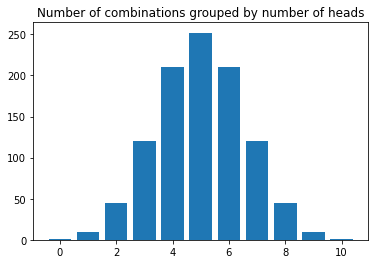

In [19]:
import math
import matplotlib.pyplot as plt

heads = 0
xax = []
yax = []
totals = 0

while heads < 11:
    # calculates the number of combinations of number of heads in a 10-flip sequence
    combis = math.comb(10,heads)
    print(f'Number of {heads}-head combinations: {combis}')
    # adds number of heads to a variable to be used as x-axis
    xax.append(heads)
    # adds number of combinations to a variable to be used as y-axis
    yax.append(combis)
    # increases value of head by 1 to anticipate next loop
    heads = heads + 1
    totals = totals + combis

print(f'Total number of combinations {totals}')
# plots to a bar chart
plt.bar(xax,yax)
plt.title("Number of combinations grouped by number of heads")
plt.show()

Turns out that Ian had anticipated this, and done a much cleaner version:

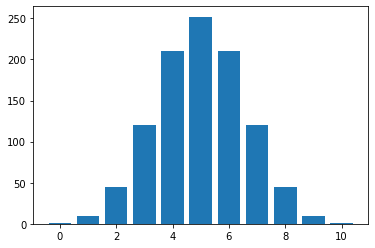

In [16]:
import matplotlib.pyplot as plt

coins = 10
# The numbers from 0 to 10 inclusive
x = list(range(coins + 1))
# The number of ways of selecting i things from 10
y = [math.comb(coins, i) for i in x]

plt.bar(x,y)
plt.show()

So the chance of getting a 0-head or a 10-head combination is just 1/1024 each, but the chance of getting a 5-head combination is still only just under 1 in 4 (252/1024).

### Testing numPy

To test the accuracy of numPy you can replicate these coin flips any number of times.

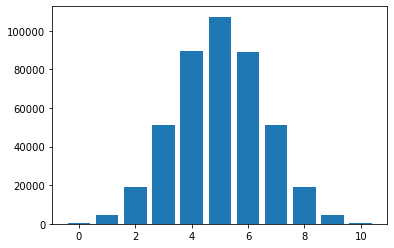

In [23]:
coins = 10
trials = 435243
# run a the defined number of trials
heads = np.random.binomial(coins, 0.5, trials)
# count the unique values in the returned list
vals, counts = np.unique(heads, return_counts=True)
plt.bar(vals, counts)
plt.show()

A similar shape emerges, I'd argue it is likely identical. Over time, as the number of tests increases, the results will more accurately fit the desired trend.